<a href="https://colab.research.google.com/github/carolinalima86/Tratamento-de-Dados/blob/main/Tratamento_Dados_Escolas_Municipais_de_Recife_Anos_finais_2012_a_2023_TreinaRecife.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#dados = pd.read_csv(r'C:\lixo\aula.csv', sep = ";", header=0)
dados = pd.read_csv(r'C:\Users\TreinaRecife\Downloads\aula.csv', sep = ";",header=0)

In [ ]:
dados

,ano,escola,endereco_bairro,situacao_codigo
0,2012,ABILIO GOMES,BOA VIAGEM,AP
1,2012,ABILIO GOMES,BOA VIAGEM,AP
2,2012,ABILIO GOMES,BOA VIAGEM,AP
3,2012,ABILIO GOMES,BOA VIAGEM,AP
4,2012,ABILIO GOMES,BOA VIAGEM,AP
...,...,...,...,...
789312,2023,27 DE NOVEMBRO,COHAB,AP
789313,2023,27 DE NOVEMBRO,COHAB,AP
789314,2023,27 DE NOVEMBRO,COHAB,AP
789315,2023,27 DE NOVEMBRO,COHAB,AP


In [ ]:
dados.info()
# Rangeindex: numerico e ordenado. 78913 linhas; non-null(não vazia) count: non-null. dype = tipo da coluna int e object(str) - texto

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 789317 entries, 0 to 789316
Data columns (total 4 columns):
 #   Column           Non-Null Count   Dtype 
---  ------           --------------   ----- 
 0   ano              789317 non-null  int64 
 1   escola           789317 non-null  object
 2   endereco_bairro  789317 non-null  object
 3   situacao_codigo  789317 non-null  object
dtypes: int64(1), object(3)
memory usage: 24.1+ MB


In [ ]:
# Verificar a quantidade de escola por ano - quantas escolas tem no ano -  vou agrupar por ano - contar unico( numero unico de escola) nunique
# obs? tudo que estiver em negrito é um indice - neste caso esta sendo o ano
# se fosse a quantidade de aluno colocaria em count
qtd_escola_ano = dados.groupby(['ano'])['escola'].aggregate(['nunique'])

In [ ]:
qtd_escola_ano.info()
# index na info significa que tenho nomes repetidos


<class 'pandas.core.frame.DataFrame'>
Index: 12 entries, 2012 to 2023
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   nunique  12 non-null     int64
dtypes: int64(1)
memory usage: 192.0 bytes


In [ ]:
qtd_escola_ano.columns = ['Qtd Escolas']

In [ ]:
# Transformar o indice ano em coluna
qtd_escola_ano = qtd_escola_ano.reset_index()

In [ ]:
qtd_escola_ano

,ano,Qtd Escolas
0,2012,241
1,2013,254
2,2014,253
3,2015,246
4,2016,242
5,2017,241
6,2018,238
7,2019,237
8,2020,235
9,2021,236


In [ ]:
qtd_escola_ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   ano          12 non-null     int64
 1   Qtd Escolas  12 non-null     int64
dtypes: int64(2)
memory usage: 324.0 bytes


In [ ]:
qtd_escola_ano.columns = ['Ano','Qtd Escolas']
# quantidade escolar por bairro em cada ano

In [ ]:
qtd_escola_bairro_ano = dados.groupby(['ano','endereco_bairro'])['escola'].aggregate(['nunique'])

In [ ]:
qtd_escola_bairro_ano = qtd_escola_bairro_ano.reset_index()

In [ ]:
qtd_escola_bairro_ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 838 entries, 0 to 837
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ano              838 non-null    int64 
 1   endereco_bairro  838 non-null    object
 2   nunique          838 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 19.8+ KB


In [ ]:
qtd_escola_bairro_ano.columns = ['Ano','Bairro','Quantidade']

In [ ]:
qtd_escola_bairro_ano = qtd_escola_bairro_ano.reset_index()

In [ ]:
qtd_escola_bairro_ano

,index,Ano,Bairro,Quantidade
0,0,2012,AFOGADOS,3
1,1,2012,AGUA FRIA,11
2,2,2012,ALTO DO MANDU,1
3,3,2012,ALTO JOSE BONIFACIO,2
4,4,2012,ALTO JOSE DO PINHO,2
...,...,...,...,...
833,833,2023,TORRE,1
834,834,2023,TORREAO,1
835,835,2023,TORROES,4
836,836,2023,VARZEA,10


In [ ]:
qtd_situacao_ano = dados.groupby(['ano','situacao_codigo'])['situacao_codigo'].aggregate(['count'])

In [ ]:
qtd_situacao_ano

count
ano  situacao_codigo       
2012 AP               55201
     DE                1135
     FA                  14
     NC                  21
     RP                7563
...                     ...
2023 AP               63627
     DE                  99
     FA                  15
     RP                1729
     TR                3851

[65 rows x 1 columns]

In [ ]:
qtd_situacao_ano = qtd_situacao_ano.reset_index()

In [ ]:
qtd_situacao_ano

,ano,situacao_codigo,count
0,2012,AP,55201
1,2012,DE,1135
2,2012,FA,14
3,2012,NC,21
4,2012,RP,7563
...,...,...,...
60,2023,AP,63627
61,2023,DE,99
62,2023,FA,15
63,2023,RP,1729


In [ ]:
qtd_situacao_ano.columns = ['Ano', 'Situacao', 'Quantidade']

In [ ]:
qtd_situacao_ano

,Ano,Situacao,Quantidade
0,2012,AP,55201
1,2012,DE,1135
2,2012,FA,14
3,2012,NC,21
4,2012,RP,7563
...,...,...,...
60,2023,AP,63627
61,2023,DE,99
62,2023,FA,15
63,2023,RP,1729


In [ ]:
qtd_situacao_ano = qtd_situacao_ano.pivot_table(values='Quantidade',columns='Situacao',index=['Ano'])

In [ ]:
qtd_situacao_ano = qtd_situacao_ano.reset_index()

In [ ]:
qtd_situacao_ano = qtd_situacao_ano.fillna(0)

In [ ]:
qtd_situacao_ano

Situacao,Ano,AP,DE,FA,NC,RP,TR
0,2012,55201.0,1135.0,14.0,21.0,7563.0,2347.0
1,2013,54968.0,1095.0,6.0,58.0,7154.0,1828.0
2,2014,51036.0,1504.0,9.0,112.0,10334.0,2275.0
3,2015,11970.0,462.0,18.0,16.0,48292.0,3534.0
4,2016,4646.0,319.0,13.0,0.0,57006.0,3379.0
5,2017,49740.0,531.0,23.0,0.0,11281.0,3660.0
6,2018,53764.0,516.0,15.0,2.0,6509.0,3969.0
7,2019,55123.0,333.0,12.0,0.0,4473.0,3862.0
8,2020,60634.0,26.0,9.0,0.0,872.0,1372.0
9,2021,63080.0,21.0,9.0,0.0,1605.0,2318.0


In [ ]:
# tranformar os dados float em int
qtd_situacao_ano.columns

Index(['Ano', 'AP', 'DE', 'FA', 'NC', 'RP', 'TR'], dtype='object', name='Situacao')

In [ ]:
qtd_situacao_ano[['Ano','AP', 'DE', 'FA', 'NC', 'RP', 'TR']] = qtd_situacao_ano[['Ano','AP', 'DE', 'FA', 'NC', 'RP', 'TR']].astype(int)

In [ ]:
qtd_situacao_ano

Situacao,Ano,AP,DE,FA,NC,RP,TR
0,2012,55201,1135,14,21,7563,2347
1,2013,54968,1095,6,58,7154,1828
2,2014,51036,1504,9,112,10334,2275
3,2015,11970,462,18,16,48292,3534
4,2016,4646,319,13,0,57006,3379
5,2017,49740,531,23,0,11281,3660
6,2018,53764,516,15,2,6509,3969
7,2019,55123,333,12,0,4473,3862
8,2020,60634,26,9,0,872,1372
9,2021,63080,21,9,0,1605,2318


In [ ]:
qtd_situacao_ano['Indap'] = (qtd_situacao_ano['AP'] / (qtd_situacao_ano['AP'] + qtd_situacao_ano['RP'])) * 100

In [ ]:
qtd_situacao_ano

Situacao,Ano,AP,DE,FA,NC,RP,TR,Indap
0,2012,55201,1135,14,21,7563,2347,87.950099
1,2013,54968,1095,6,58,7154,1828,88.483951
2,2014,51036,1504,9,112,10334,2275,83.161154
3,2015,11970,462,18,16,48292,3534,19.863264
4,2016,4646,319,13,0,57006,3379,7.535846
5,2017,49740,531,23,0,11281,3660,81.512922
6,2018,53764,516,15,2,6509,3969,89.200803
7,2019,55123,333,12,0,4473,3862,92.494463
8,2020,60634,26,9,0,872,1372,98.582252
9,2021,63080,21,9,0,1605,2318,97.518745


In [ ]:
qtd_situacao_ano['IndFA'] = (qtd_situacao_ano['FA'] / (qtd_situacao_ano['AP'] + qtd_situacao_ano['RP'])) * 100

In [ ]:
qtd_situacao_ano

Situacao,Ano,AP,DE,FA,NC,RP,TR,Indap,IndFA
0,2012,55201,1135,14,21,7563,2347,87.950099,0.022306
1,2013,54968,1095,6,58,7154,1828,88.483951,0.009658
2,2014,51036,1504,9,112,10334,2275,83.161154,0.014665
3,2015,11970,462,18,16,48292,3534,19.863264,0.029870
4,2016,4646,319,13,0,57006,3379,7.535846,0.021086
5,2017,49740,531,23,0,11281,3660,81.512922,0.037692
6,2018,53764,516,15,2,6509,3969,89.200803,0.024887
7,2019,55123,333,12,0,4473,3862,92.494463,0.020136
8,2020,60634,26,9,0,872,1372,98.582252,0.014633
9,2021,63080,21,9,0,1605,2318,97.518745,0.013914


In [ ]:
qtd_situacao_ano['Matr'] =  qtd_situacao_ano['AP'] + \
                            qtd_situacao_ano['DE'] + \
                            qtd_situacao_ano['FA'] + \
                            qtd_situacao_ano['NC'] + \
                            qtd_situacao_ano['RP']


In [ ]:
qtd_situacao_ano

Situacao,Ano,AP,DE,FA,NC,RP,TR,Indap,IndFA,Matr
0,2012,55201,1135,14,21,7563,2347,87.950099,0.022306,63934
1,2013,54968,1095,6,58,7154,1828,88.483951,0.009658,63281
2,2014,51036,1504,9,112,10334,2275,83.161154,0.014665,62995
3,2015,11970,462,18,16,48292,3534,19.863264,0.029870,60758
4,2016,4646,319,13,0,57006,3379,7.535846,0.021086,61984
5,2017,49740,531,23,0,11281,3660,81.512922,0.037692,61575
6,2018,53764,516,15,2,6509,3969,89.200803,0.024887,60806
7,2019,55123,333,12,0,4473,3862,92.494463,0.020136,59941
8,2020,60634,26,9,0,872,1372,98.582252,0.014633,61541
9,2021,63080,21,9,0,1605,2318,97.518745,0.013914,64715


In [ ]:
# quantidade de bairros em escola por ano
qtd_bairros_com_ano = dados.groupby(['ano'])['endereco_bairro'].aggregate(['nunique'])

In [ ]:
qtd_bairros_com_ano

,nunique
ano,
2012,70
2013,71
2014,71
2015,70
2016,70
2017,70
2018,69
2019,69
2020,69


In [ ]:
qtd_bairros_com_ano = qtd_bairros_com_ano.reset_index()

In [ ]:
qtd_bairros_com_ano

,ano,nunique
0,2012,70
1,2013,71
2,2014,71
3,2015,70
4,2016,70
5,2017,70
6,2018,69
7,2019,69
8,2020,69
9,2021,69


In [ ]:
qtd_bairros_com_ano.columns = ['Ano','Quantidade']

In [ ]:
qtd_bairros_com_ano

,Ano,Quantidade
0,2012,70
1,2013,71
2,2014,71
3,2015,70
4,2016,70
5,2017,70
6,2018,69
7,2019,69
8,2020,69
9,2021,69


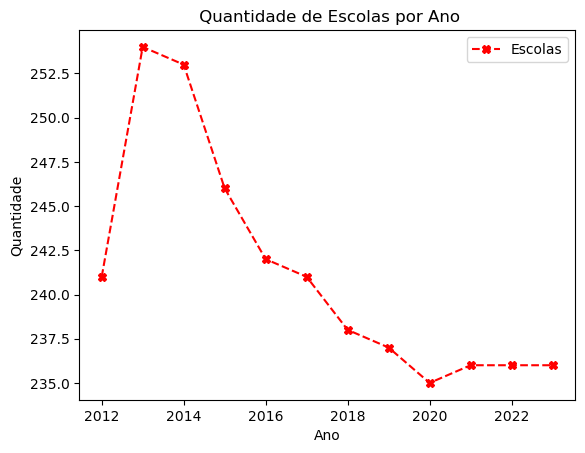

In [ ]:
plt.title(' Quantidade de Escolas por Ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
#plt.ylim(0,260)
plt.plot(qtd_escola_ano['Ano'], qtd_escola_ano['Qtd Escolas'], color='#ff0000', linestyle ='--',marker = 'X', label='Escolas')
plt.legend()
plt.show()

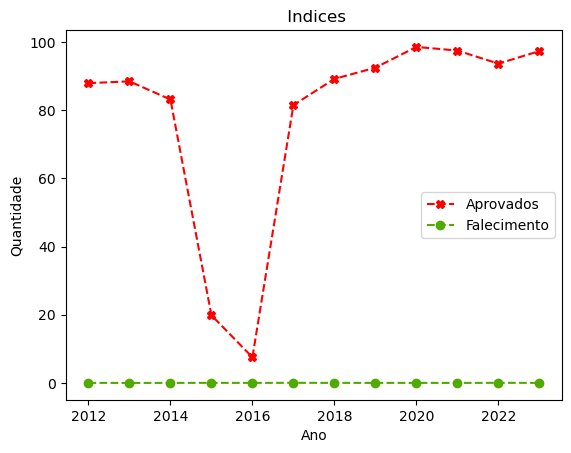

In [ ]:
plt.title(' Indices')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.plot(qtd_situacao_ano['Ano'], qtd_situacao_ano['Indap'], color='#ff0000', linestyle ='--',marker = 'X', label = 'Aprovados')
plt.plot(qtd_situacao_ano['Ano'], qtd_situacao_ano['IndFA'], color='#50AA00', linestyle ='--',marker = 'o', label = 'Falecimento')
plt.legend()
plt.show()

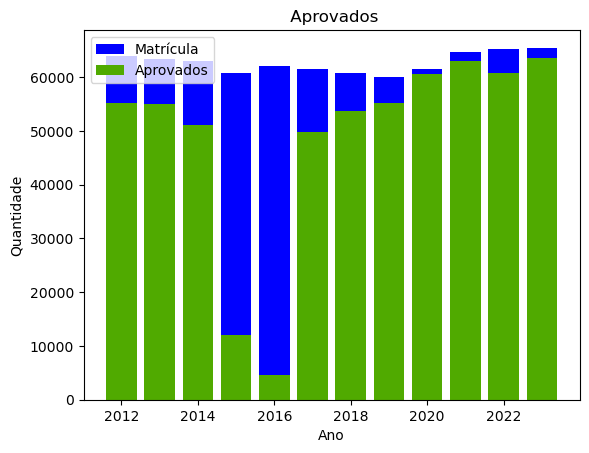

In [ ]:
plt.title(' Aprovados')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.bar(qtd_situacao_ano['Ano'], qtd_situacao_ano['Matr'], color='#0000ff',label='Matrícula')
plt.bar(qtd_situacao_ano['Ano'], qtd_situacao_ano['AP'], color='#50AA00', label = 'Aprovados')
plt.legend()
plt.show()

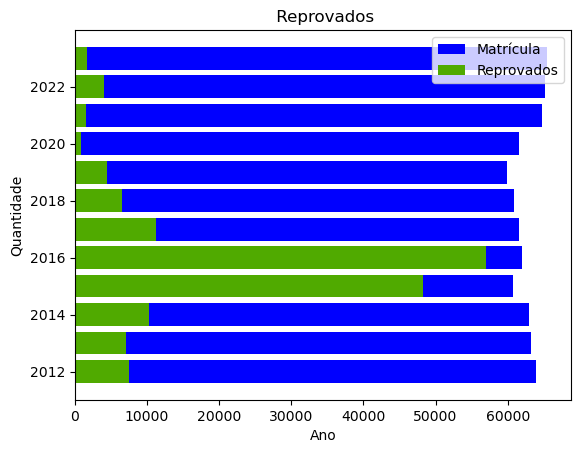

In [ ]:
plt.title(' Reprovados')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.barh(qtd_situacao_ano['Ano'], qtd_situacao_ano['Matr'], color='#0000ff',label='Matrícula')
plt.barh(qtd_situacao_ano['Ano'], qtd_situacao_ano['RP'], color='#50AA00', label = 'Reprovados')
plt.legend()
plt.show()

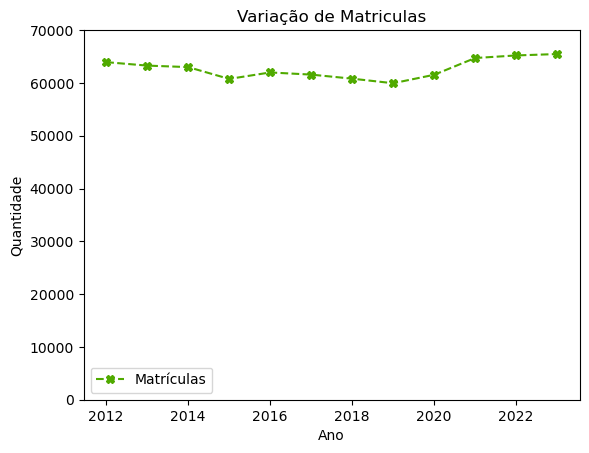

In [ ]:
plt.title('Variação de Matriculas')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.plot(qtd_situacao_ano['Ano'],qtd_situacao_ano['Matr'], color='#50AA00',  linestyle='--',  marker='X', label='Matrículas' )
plt.legend()
plt.ylim(0,70000)
plt.show()

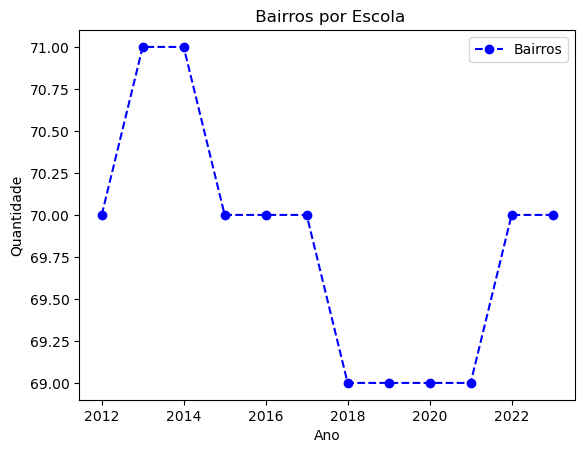

In [ ]:
plt.title(' Bairros por Escola')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.plot(qtd_bairros_com_ano['Ano'], qtd_bairros_com_ano['Quantidade'], color='#0000ff',linestyle ='--',marker = 'o',label='Bairros')
plt.legend()
plt.show()

In [ ]:
qtd_bairros_com_ano

,Ano,Quantidade
0,2012,70
1,2013,71
2,2014,71
3,2015,70
4,2016,70
5,2017,70
6,2018,69
7,2019,69
8,2020,69
9,2021,69


In [ ]:
qtd_bairros_com_ano = dados.groupby(['ano','endereco_bairro'])['escola'].aggregate(['nunique'])

In [ ]:
qtd_bairros_com_ano.reset_index()

,ano,endereco_bairro,nunique
0,2012,AFOGADOS,3
1,2012,AGUA FRIA,11
2,2012,ALTO DO MANDU,1
3,2012,ALTO JOSE BONIFACIO,2
4,2012,ALTO JOSE DO PINHO,2
...,...,...,...
833,2023,TORRE,1
834,2023,TORREAO,1
835,2023,TORROES,4
836,2023,VARZEA,10


In [ ]:
qtd_bairros_com_ano = qtd_bairros_com_ano.reset_index()

In [ ]:
qtd_bairros_com_ano.columns = ['Ano','Bairro','Quantidade']

In [ ]:
qtd_bairros_com_ano = qtd_escola_bairro_ano.pivot_table(values='Quantidade',columns='Ano',index=['Bairro'])

In [ ]:
qtd_bairros_com_ano.reset_index()

Ano,Bairro,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,AFOGADOS,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0
1,AGUA FRIA,11.0,10.0,11.0,10.0,10.0,11.0,11.0,11.0,11.0,11.0,11.0,11.0
2,ALTO DO MANDU,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
3,ALTO JOSE BONIFACIO,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,ALTO JOSE DO PINHO,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,TORRE,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0
68,TORREAO,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
69,TORROES,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
70,VARZEA,11.0,11.0,11.0,11.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0


In [ ]:
qtd_bairros_com_ano = qtd_bairros_com_ano.fillna(0)

In [ ]:
qtd_bairros_com_ano[[2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]] =qtd_bairros_com_ano[[2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023]].astype(int)

In [ ]:
qtd_bairros_com_ano

Ano,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
Bairro,,,,,,,,,,,,
AFOGADOS,3,3,3,3,3,3,3,3,3,3,3,3
AGUA FRIA,11,10,11,10,10,11,11,11,11,11,11,11
ALTO DO MANDU,1,1,1,1,1,1,1,1,1,1,1,1
ALTO JOSE BONIFACIO,2,2,2,2,2,2,2,2,2,2,2,2
ALTO JOSE DO PINHO,2,2,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...
TORRE,1,2,2,2,2,2,2,2,1,1,1,1
TORREAO,1,1,1,1,1,1,1,1,1,1,1,1
TORROES,4,4,4,4,4,4,4,4,4,4,4,4


In [ ]:
qtd_bairros_com_ano.describe()

Ano,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,3.347222,3.527778,3.513889,3.416667,3.361111,3.347222,3.305556,3.291667,3.263889,3.277778,3.277778,3.277778
std,3.468814,3.443599,3.460005,3.413932,3.290214,3.289590,3.300187,3.252031,3.215250,3.211872,3.238076,3.238076
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,4.000000,5.000000,4.250000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,20.000000,20.000000,20.000000,20.000000,19.000000,19.000000,19.000000,19.000000,19.000000,19.000000,20.000000,20.000000


In [ ]:
juntos = pd.merge(qtd_escola_bairro_ano.query('Quantidade < 70'),qtd_escola_ano, how = 'inner',left_on=['Ano'],right_on=['Ano'])

In [ ]:
juntos

,index,Ano,Bairro,Quantidade,Qtd Escolas
0,0,2012,AFOGADOS,3,241
1,1,2012,AGUA FRIA,11,241
2,2,2012,ALTO DO MANDU,1,241
3,3,2012,ALTO JOSE BONIFACIO,2,241
4,4,2012,ALTO JOSE DO PINHO,2,241
...,...,...,...,...,...
833,833,2023,TORRE,1,236
834,834,2023,TORREAO,1,236
835,835,2023,TORROES,4,236
836,836,2023,VARZEA,10,236


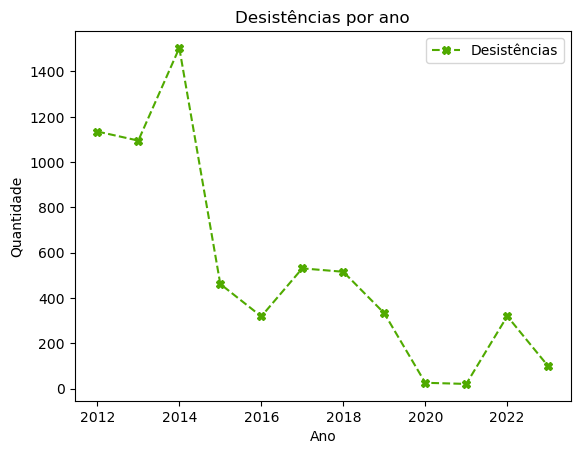

In [ ]:
plt.title('Desistências por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.plot(qtd_situacao_ano['Ano'],qtd_situacao_ano['DE'], color='#50AA00',  linestyle='--',  marker='X', label='Desistências' )
plt.legend()
plt.show()

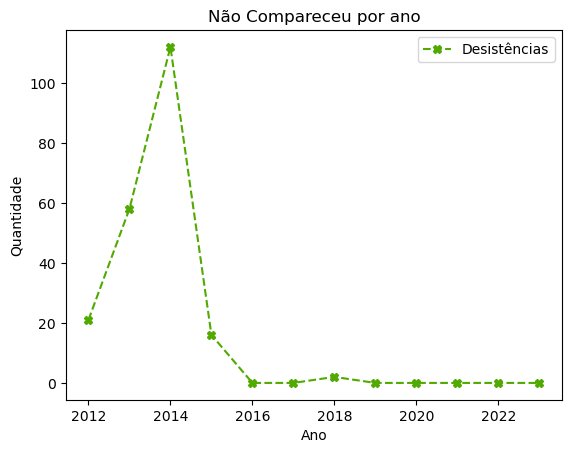

In [ ]:
plt.title('Não Compareceu por ano')
plt.xlabel('Ano')
plt.ylabel('Quantidade')
plt.plot(qtd_situacao_ano['Ano'],qtd_situacao_ano['NC'], color='#50AA00',  linestyle='--',  marker='X', label='Desistências' )
plt.legend()
plt.show()

In [ ]:
situacao_final_ano = dados.groupby(['ano','endereco_bairro','escola','situacao_codigo'])['situacao_codigo'].aggregate(['count']).reset_index()

In [ ]:
situacao_final_ano

,ano,endereco_bairro,escola,situacao_codigo,count
0,2012,AFOGADOS,EDITE BRAGA,AP,199
1,2012,AFOGADOS,EDITE BRAGA,RP,24
2,2012,AFOGADOS,EDITE BRAGA,TR,13
3,2012,AFOGADOS,SANTA EDWIGES,AP,148
4,2012,AFOGADOS,SANTA EDWIGES,DE,2
...,...,...,...,...,...
9652,2023,VASCO DA GAMA,PROFESSORA ALMERINDA UMBELINO DE BARROS,RP,27
9653,2023,VASCO DA GAMA,PROFESSORA ALMERINDA UMBELINO DE BARROS,TR,40
9654,2023,VASCO DA GAMA,SANTA MARIA GORETTI,AP,290
9655,2023,VASCO DA GAMA,SANTA MARIA GORETTI,RP,1


In [ ]:
situacao_final_ano.columns = ['Ano','Bairro','Escola','Situacao','Quantidade']

In [ ]:
situacao_final_ano = situacao_final_ano.pivot_table(values='Quantidade',columns='Situacao',index=['Ano','Bairro','Escola']).reset_index()

In [ ]:
situacao_final_ano

Situacao,Ano,Bairro,Escola,AP,DE,FA,NC,RP,TR
0,2012,AFOGADOS,EDITE BRAGA,199.0,NaN,NaN,NaN,24.0,13.0
1,2012,AFOGADOS,SANTA EDWIGES,148.0,2.0,NaN,NaN,4.0,NaN
2,2012,AFOGADOS,VILA SAO MIGUEL,279.0,1.0,NaN,NaN,33.0,13.0
3,2012,AGUA FRIA,ALDA ROMEU,213.0,1.0,NaN,NaN,32.0,1.0
4,2012,AGUA FRIA,ALTO DO PASCOAL,363.0,NaN,NaN,NaN,51.0,17.0
...,...,...,...,...,...,...,...,...,...
2890,2023,VASCO DA GAMA,DOM JOSE LAMARTINE SOARES,265.0,NaN,NaN,NaN,5.0,8.0
2891,2023,VASCO DA GAMA,OCTAVIO DE MEIRA LINS,490.0,1.0,NaN,NaN,2.0,23.0
2892,2023,VASCO DA GAMA,PROFESSOR ADERBAL GALVAO,406.0,NaN,NaN,NaN,1.0,18.0
2893,2023,VASCO DA GAMA,PROFESSORA ALMERINDA UMBELINO DE BARROS,577.0,NaN,NaN,NaN,27.0,40.0


In [ ]:
situacao_final_ano = situacao_final_ano.fillna(0)

In [ ]:
situacao_final_ano

Situacao,Ano,Bairro,Escola,AP,DE,FA,NC,RP,TR
0,2012,AFOGADOS,EDITE BRAGA,199.0,0.0,0.0,0.0,24.0,13.0
1,2012,AFOGADOS,SANTA EDWIGES,148.0,2.0,0.0,0.0,4.0,0.0
2,2012,AFOGADOS,VILA SAO MIGUEL,279.0,1.0,0.0,0.0,33.0,13.0
3,2012,AGUA FRIA,ALDA ROMEU,213.0,1.0,0.0,0.0,32.0,1.0
4,2012,AGUA FRIA,ALTO DO PASCOAL,363.0,0.0,0.0,0.0,51.0,17.0
...,...,...,...,...,...,...,...,...,...
2890,2023,VASCO DA GAMA,DOM JOSE LAMARTINE SOARES,265.0,0.0,0.0,0.0,5.0,8.0
2891,2023,VASCO DA GAMA,OCTAVIO DE MEIRA LINS,490.0,1.0,0.0,0.0,2.0,23.0
2892,2023,VASCO DA GAMA,PROFESSOR ADERBAL GALVAO,406.0,0.0,0.0,0.0,1.0,18.0
2893,2023,VASCO DA GAMA,PROFESSORA ALMERINDA UMBELINO DE BARROS,577.0,0.0,0.0,0.0,27.0,40.0


In [ ]:
situacao_final_ano[['AP','DE','FA','NC','RP','TR']] = situacao_final_ano[['AP','DE','FA','NC','RP','TR']].astype(int)

In [ ]:
situacao_final_ano

Situacao,Ano,Bairro,Escola,AP,DE,FA,NC,RP,TR
0,2012,AFOGADOS,EDITE BRAGA,199,0,0,0,24,13
1,2012,AFOGADOS,SANTA EDWIGES,148,2,0,0,4,0
2,2012,AFOGADOS,VILA SAO MIGUEL,279,1,0,0,33,13
3,2012,AGUA FRIA,ALDA ROMEU,213,1,0,0,32,1
4,2012,AGUA FRIA,ALTO DO PASCOAL,363,0,0,0,51,17
...,...,...,...,...,...,...,...,...,...
2890,2023,VASCO DA GAMA,DOM JOSE LAMARTINE SOARES,265,0,0,0,5,8
2891,2023,VASCO DA GAMA,OCTAVIO DE MEIRA LINS,490,1,0,0,2,23
2892,2023,VASCO DA GAMA,PROFESSOR ADERBAL GALVAO,406,0,0,0,1,18
2893,2023,VASCO DA GAMA,PROFESSORA ALMERINDA UMBELINO DE BARROS,577,0,0,0,27,40


In [ ]:
situacao_final_ano["Matriculados"]= situacao_final_ano[['AP','DE','FA','NC','RP','TR']].sum(axis = 1)

In [ ]:
situacao_final_ano

Situacao,Ano,Bairro,Escola,AP,DE,FA,NC,RP,TR,Matriculados
0,2012,AFOGADOS,EDITE BRAGA,199,0,0,0,24,13,236
1,2012,AFOGADOS,SANTA EDWIGES,148,2,0,0,4,0,154
2,2012,AFOGADOS,VILA SAO MIGUEL,279,1,0,0,33,13,326
3,2012,AGUA FRIA,ALDA ROMEU,213,1,0,0,32,1,247
4,2012,AGUA FRIA,ALTO DO PASCOAL,363,0,0,0,51,17,431
...,...,...,...,...,...,...,...,...,...,...
2890,2023,VASCO DA GAMA,DOM JOSE LAMARTINE SOARES,265,0,0,0,5,8,278
2891,2023,VASCO DA GAMA,OCTAVIO DE MEIRA LINS,490,1,0,0,2,23,516
2892,2023,VASCO DA GAMA,PROFESSOR ADERBAL GALVAO,406,0,0,0,1,18,425
2893,2023,VASCO DA GAMA,PROFESSORA ALMERINDA UMBELINO DE BARROS,577,0,0,0,27,40,644


In [ ]:
situacao_final_ano["Indap"]= (situacao_final_ano['AP'] / (situacao_final_ano['AP'] + situacao_final_ano['RP'])) * 100

In [ ]:
situacao_final_ano

Situacao,Ano,Bairro,Escola,AP,DE,FA,NC,RP,TR,Matriculados,Indap
0,2012,AFOGADOS,EDITE BRAGA,199,0,0,0,24,13,236,89.237668
1,2012,AFOGADOS,SANTA EDWIGES,148,2,0,0,4,0,154,97.368421
2,2012,AFOGADOS,VILA SAO MIGUEL,279,1,0,0,33,13,326,89.423077
3,2012,AGUA FRIA,ALDA ROMEU,213,1,0,0,32,1,247,86.938776
4,2012,AGUA FRIA,ALTO DO PASCOAL,363,0,0,0,51,17,431,87.681159
...,...,...,...,...,...,...,...,...,...,...,...
2890,2023,VASCO DA GAMA,DOM JOSE LAMARTINE SOARES,265,0,0,0,5,8,278,98.148148
2891,2023,VASCO DA GAMA,OCTAVIO DE MEIRA LINS,490,1,0,0,2,23,516,99.593496
2892,2023,VASCO DA GAMA,PROFESSOR ADERBAL GALVAO,406,0,0,0,1,18,425,99.754300
2893,2023,VASCO DA GAMA,PROFESSORA ALMERINDA UMBELINO DE BARROS,577,0,0,0,27,40,644,95.529801


In [ ]:
for ano in range(situacao_final_ano['Ano'].min(),situacao_final_ano['Ano'].max()+1):
    df = 'situacao_final_'+str(ano) # nome do daframe que vou criar
    filtro = 'Ano == '+str(ano)
    vars()[df] = situacao_final_ano.query(filtro) # criando uma variavel cujo o conteudo que esta em df

In [ ]:
situacao_final_2013

Situacao,Ano,Bairro,Escola,AP,DE,FA,NC,RP,TR,Matriculados,Indap
241,2013,AFOGADOS,EDITE BRAGA,196,3,0,0,18,7,224,91.588785
242,2013,AFOGADOS,SANTA EDWIGES,144,0,0,0,10,0,154,93.506494
243,2013,AFOGADOS,VILA SAO MIGUEL,277,9,0,0,17,10,313,94.217687
244,2013,AGUA FRIA,ALDA ROMEU,171,3,0,0,34,3,211,83.414634
245,2013,AGUA FRIA,ALTO DO PASCOAL,330,10,0,0,59,18,417,84.832905
...,...,...,...,...,...,...,...,...,...,...,...
490,2013,VASCO DA GAMA,DOM JOSE LAMARTINE SOARES - ANEXO I CVC,58,0,0,0,0,2,60,100.000000
491,2013,VASCO DA GAMA,OCTAVIO DE MEIRA LINS,387,7,0,0,115,28,537,77.091633
492,2013,VASCO DA GAMA,PROFESSOR ADERBAL GALVAO,305,9,0,0,64,15,393,82.655827
493,2013,VASCO DA GAMA,PROFESSORA ALMERINDA UMBELINO DE BARROS,426,20,0,0,96,5,547,81.609195


In [ ]:
situacao_final_2014

Situacao,Ano,Bairro,Escola,AP,DE,FA,NC,RP,TR,Matriculados,Indap
495,2014,AFOGADOS,EDITE BRAGA,171,4,0,0,34,8,217,83.414634
496,2014,AFOGADOS,SANTA EDWIGES,135,1,0,0,13,7,156,91.216216
497,2014,AFOGADOS,VILA SAO MIGUEL,251,4,0,0,50,15,320,83.388704
498,2014,AGUA FRIA,ALDA ROMEU,179,3,0,0,44,7,233,80.269058
499,2014,AGUA FRIA,ALTO DO PASCOAL,270,5,0,0,70,0,345,79.411765
...,...,...,...,...,...,...,...,...,...,...,...
743,2014,VASCO DA GAMA,DOM JOSE LAMARTINE SOARES - ANEXO I CVC,36,0,0,0,0,3,39,100.000000
744,2014,VASCO DA GAMA,OCTAVIO DE MEIRA LINS,332,3,0,1,190,26,552,63.601533
745,2014,VASCO DA GAMA,PROFESSOR ADERBAL GALVAO,300,4,0,0,69,7,380,81.300813
746,2014,VASCO DA GAMA,PROFESSORA ALMERINDA UMBELINO DE BARROS,359,24,0,0,159,16,558,69.305019


In [ ]:
situacao_final_2015

Situacao,Ano,Bairro,Escola,AP,DE,FA,NC,RP,TR,Matriculados,Indap
748,2015,AFOGADOS,EDITE BRAGA,112,1,0,0,101,10,224,52.582160
749,2015,AFOGADOS,SANTA EDWIGES,53,1,0,0,97,8,159,35.333333
750,2015,AFOGADOS,VILA SAO MIGUEL,114,1,0,0,186,25,326,38.000000
751,2015,AGUA FRIA,ALDA ROMEU,44,1,0,0,170,6,221,20.560748
752,2015,AGUA FRIA,ALTO DO PASCOAL,130,1,0,0,229,13,373,36.211699
...,...,...,...,...,...,...,...,...,...,...,...
989,2015,VASCO DA GAMA,DOM JOSE LAMARTINE SOARES - ANEXO I CVC,0,0,0,0,36,3,39,0.000000
990,2015,VASCO DA GAMA,OCTAVIO DE MEIRA LINS,108,1,0,0,343,25,477,23.946785
991,2015,VASCO DA GAMA,PROFESSOR ADERBAL GALVAO,36,2,0,0,358,14,410,9.137056
992,2015,VASCO DA GAMA,PROFESSORA ALMERINDA UMBELINO DE BARROS,17,1,0,0,483,12,513,3.400000


In [ ]:
situacao_final_2016

Situacao,Ano,Bairro,Escola,AP,DE,FA,NC,RP,TR,Matriculados,Indap
994,2016,AFOGADOS,EDITE BRAGA,68,1,0,0,158,10,237,30.088496
995,2016,AFOGADOS,SANTA EDWIGES,0,0,0,0,153,5,158,0.000000
996,2016,AFOGADOS,VILA SAO MIGUEL,23,1,0,0,304,18,346,7.033639
997,2016,AGUA FRIA,ALDA ROMEU,0,0,0,0,207,5,212,0.000000
998,2016,AGUA FRIA,ALTO DO PASCOAL,68,3,0,0,357,10,438,16.000000
...,...,...,...,...,...,...,...,...,...,...,...
1231,2016,VASCO DA GAMA,DOM JOSE LAMARTINE SOARES - ANEXO I CVC,0,0,0,0,57,0,57,0.000000
1232,2016,VASCO DA GAMA,OCTAVIO DE MEIRA LINS,60,0,0,0,423,13,496,12.422360
1233,2016,VASCO DA GAMA,PROFESSOR ADERBAL GALVAO,0,0,0,0,388,8,396,0.000000
1234,2016,VASCO DA GAMA,PROFESSORA ALMERINDA UMBELINO DE BARROS,0,0,0,0,515,28,543,0.000000


In [ ]:
situacao_final_2017

Situacao,Ano,Bairro,Escola,AP,DE,FA,NC,RP,TR,Matriculados,Indap
1236,2017,AFOGADOS,EDITE BRAGA,216,2,0,0,21,11,250,91.139241
1237,2017,AFOGADOS,SANTA EDWIGES,142,4,0,0,7,2,155,95.302013
1238,2017,AFOGADOS,VILA SAO MIGUEL,302,1,0,0,30,10,343,90.963855
1239,2017,AGUA FRIA,ALDA ROMEU,173,3,0,0,38,7,221,81.990521
1240,2017,AGUA FRIA,ALTO DO PASCOAL,375,8,0,0,51,2,436,88.028169
...,...,...,...,...,...,...,...,...,...,...,...
1472,2017,VASCO DA GAMA,DOM JOSE LAMARTINE SOARES - ANEXO I CVC,47,0,0,0,3,2,52,94.000000
1473,2017,VASCO DA GAMA,OCTAVIO DE MEIRA LINS,30,0,0,0,420,19,469,6.666667
1474,2017,VASCO DA GAMA,PROFESSOR ADERBAL GALVAO,1,0,0,0,382,12,395,0.261097
1475,2017,VASCO DA GAMA,PROFESSORA ALMERINDA UMBELINO DE BARROS,59,0,0,0,559,46,664,9.546926


In [ ]:
situacao_final_2018

Situacao,Ano,Bairro,Escola,AP,DE,FA,NC,RP,TR,Matriculados,Indap
1477,2018,AFOGADOS,EDITE BRAGA,212,0,0,0,12,17,241,94.642857
1478,2018,AFOGADOS,SANTA EDWIGES,140,2,0,0,13,15,170,91.503268
1479,2018,AFOGADOS,VILA SAO MIGUEL,314,0,0,0,11,19,344,96.615385
1480,2018,AGUA FRIA,ALDA ROMEU,204,0,0,0,7,14,225,96.682464
1481,2018,AGUA FRIA,ALTO DO PASCOAL,355,2,0,0,27,9,393,92.931937
...,...,...,...,...,...,...,...,...,...,...,...
1710,2018,VASCO DA GAMA,DOM JOSE LAMARTINE SOARES - ANEXO I CVC,53,0,0,0,4,1,58,92.982456
1711,2018,VASCO DA GAMA,OCTAVIO DE MEIRA LINS,424,3,0,0,73,34,534,85.311871
1712,2018,VASCO DA GAMA,PROFESSOR ADERBAL GALVAO,334,3,0,0,57,12,406,85.421995
1713,2018,VASCO DA GAMA,PROFESSORA ALMERINDA UMBELINO DE BARROS,572,13,1,0,62,46,694,90.220820


In [ ]:
situacao_final_2019

Situacao,Ano,Bairro,Escola,AP,DE,FA,NC,RP,TR,Matriculados,Indap
1715,2019,AFOGADOS,EDITE BRAGA,205,0,0,0,18,17,240,91.928251
1716,2019,AFOGADOS,SANTA EDWIGES,150,0,0,0,8,4,162,94.936709
1717,2019,AFOGADOS,VILA SAO MIGUEL,317,2,0,0,11,12,342,96.646341
1718,2019,AGUA FRIA,ALDA ROMEU,195,0,0,0,9,7,211,95.588235
1719,2019,AGUA FRIA,ALTO DO PASCOAL,345,4,0,0,9,15,373,97.457627
...,...,...,...,...,...,...,...,...,...,...,...
1947,2019,VASCO DA GAMA,DOM JOSE LAMARTINE SOARES - ANEXO I CVC,40,0,0,0,4,5,49,90.909091
1948,2019,VASCO DA GAMA,OCTAVIO DE MEIRA LINS,454,4,0,0,37,23,518,92.464358
1949,2019,VASCO DA GAMA,PROFESSOR ADERBAL GALVAO,364,0,0,0,28,20,412,92.857143
1950,2019,VASCO DA GAMA,PROFESSORA ALMERINDA UMBELINO DE BARROS,557,0,0,0,40,46,643,93.299832


In [ ]:
situacao_final_2020

Situacao,Ano,Bairro,Escola,AP,DE,FA,NC,RP,TR,Matriculados,Indap
1952,2020,AFOGADOS,EDITE BRAGA,232,0,0,0,0,5,237,100.000000
1953,2020,AFOGADOS,SANTA EDWIGES,159,0,0,0,0,3,162,100.000000
1954,2020,AFOGADOS,VILA SAO MIGUEL,363,0,0,0,0,5,368,100.000000
1955,2020,AGUA FRIA,ALDA ROMEU,201,0,0,0,0,3,204,100.000000
1956,2020,AGUA FRIA,ALTO DO PASCOAL,355,0,0,0,1,3,359,99.719101
...,...,...,...,...,...,...,...,...,...,...,...
2182,2020,VASCO DA GAMA,DOM JOSE LAMARTINE SOARES,249,0,0,0,0,0,249,100.000000
2183,2020,VASCO DA GAMA,OCTAVIO DE MEIRA LINS,509,0,0,0,0,10,519,100.000000
2184,2020,VASCO DA GAMA,PROFESSOR ADERBAL GALVAO,416,0,0,0,0,5,421,100.000000
2185,2020,VASCO DA GAMA,PROFESSORA ALMERINDA UMBELINO DE BARROS,637,0,0,0,0,27,664,100.000000


In [ ]:
situacao_final_2021

Situacao,Ano,Bairro,Escola,AP,DE,FA,NC,RP,TR,Matriculados,Indap
2187,2021,AFOGADOS,EDITE BRAGA,242,0,0,0,3,10,255,98.775510
2188,2021,AFOGADOS,SANTA EDWIGES,160,0,0,0,1,5,166,99.378882
2189,2021,AFOGADOS,VILA SAO MIGUEL,355,0,0,0,10,10,375,97.260274
2190,2021,AGUA FRIA,ALDA ROMEU,227,0,0,0,0,5,232,100.000000
2191,2021,AGUA FRIA,ALTO DO PASCOAL,401,0,0,0,2,11,414,99.503722
...,...,...,...,...,...,...,...,...,...,...,...
2418,2021,VASCO DA GAMA,DOM JOSE LAMARTINE SOARES,126,0,0,0,135,6,267,48.275862
2419,2021,VASCO DA GAMA,OCTAVIO DE MEIRA LINS,503,0,0,0,6,9,518,98.821218
2420,2021,VASCO DA GAMA,PROFESSOR ADERBAL GALVAO,417,0,0,0,6,6,429,98.581560
2421,2021,VASCO DA GAMA,PROFESSORA ALMERINDA UMBELINO DE BARROS,595,0,0,0,40,19,654,93.700787


In [ ]:
situacao_final_2022

Situacao,Ano,Bairro,Escola,AP,DE,FA,NC,RP,TR,Matriculados,Indap
2423,2022,AFOGADOS,EDITE BRAGA,136,0,0,0,108,16,260,55.737705
2424,2022,AFOGADOS,SANTA EDWIGES,135,2,0,0,2,8,147,98.540146
2425,2022,AFOGADOS,VILA SAO MIGUEL,366,0,1,0,5,24,396,98.652291
2426,2022,AGUA FRIA,ALDA ROMEU,222,0,0,0,6,17,245,97.368421
2427,2022,AGUA FRIA,ALTO DO PASCOAL,362,0,0,0,21,16,399,94.516971
...,...,...,...,...,...,...,...,...,...,...,...
2654,2022,VASCO DA GAMA,DOM JOSE LAMARTINE SOARES,252,0,0,0,5,16,273,98.054475
2655,2022,VASCO DA GAMA,OCTAVIO DE MEIRA LINS,475,0,0,0,11,17,503,97.736626
2656,2022,VASCO DA GAMA,PROFESSOR ADERBAL GALVAO,402,0,0,0,6,18,426,98.529412
2657,2022,VASCO DA GAMA,PROFESSORA ALMERINDA UMBELINO DE BARROS,601,0,0,0,48,38,687,92.604006


In [ ]:
situacao_final_2023

Situacao,Ano,Bairro,Escola,AP,DE,FA,NC,RP,TR,Matriculados,Indap
2659,2023,AFOGADOS,EDITE BRAGA,234,0,0,0,4,10,248,98.319328
2660,2023,AFOGADOS,SANTA EDWIGES,131,1,0,0,1,8,141,99.242424
2661,2023,AFOGADOS,VILA SAO MIGUEL,386,0,0,0,3,9,398,99.228792
2662,2023,AGUA FRIA,ALDA ROMEU,236,0,0,0,2,11,249,99.159664
2663,2023,AGUA FRIA,ALTO DO PASCOAL,363,0,0,0,6,20,389,98.373984
...,...,...,...,...,...,...,...,...,...,...,...
2890,2023,VASCO DA GAMA,DOM JOSE LAMARTINE SOARES,265,0,0,0,5,8,278,98.148148
2891,2023,VASCO DA GAMA,OCTAVIO DE MEIRA LINS,490,1,0,0,2,23,516,99.593496
2892,2023,VASCO DA GAMA,PROFESSOR ADERBAL GALVAO,406,0,0,0,1,18,425,99.754300
2893,2023,VASCO DA GAMA,PROFESSORA ALMERINDA UMBELINO DE BARROS,577,0,0,0,27,40,644,95.529801
